In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 2].values
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


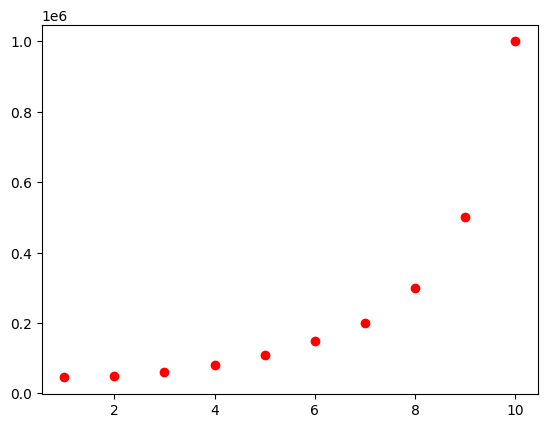

In [76]:
plt.scatter(X, y, color='red')

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
y_pred = lin_reg.predict(poly_reg.transform(X_test))

In [85]:
df['y_pred'] = lin_reg.predict(poly_reg.transform(X)).flatten().round(0).astype(int)
df

,Position,Level,Salary,y_pred
0,Business Analyst,1,45000,44999
1,Junior Consultant,2,50000,54054
2,Senior Consultant,3,60000,60078
3,Manager,4,80000,79602
4,Country Manager,5,110000,110882
5,Region Manager,6,150000,148951
6,Partner,7,200000,200675
7,Senior Partner,8,300000,299803
8,C-level,9,500000,522021
9,CEO,10,1000000,1000009


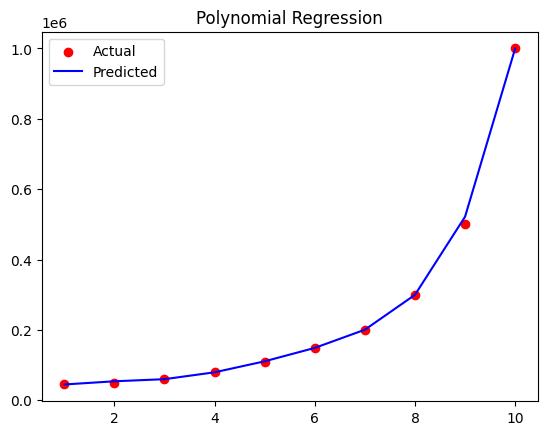

In [86]:
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue', label='Predicted')
plt.title('Polynomial Regression')
plt.legend()
plt.show()